# Project 2
### Jack Weissenberger
In the first two cells I import the necessary packages and read the data into a data frame

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/wine/wine.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In the next cell, I set my predictions y equal to the first column of the data and I set all of the feature information equal to X

In [3]:
y = df[0]
X = df.iloc[:, 1:13]

Next I do a test train split on the data

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)

The commented out code is what I initially used. I scaled the data so that the model could make a better prediction. But the issue was that the accuracy and the F1 score were always nearly 100% regardless of the C value I chose. Now I am not scaling the data so that we can see a change in the test error as I change the C value

In [5]:
"""""
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
 """
X_train_std = X_train
X_test_std = X_test

## Logistic Regression
In the next two cells I import logistic regression and train the model on the training set 

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
logmodel = LogisticRegression(penalty='l2', C = 100.0)
logmodel.fit(X_train_std, y_train)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Next I find the predictions of the logistic model using the test set

In [8]:
predictions = logmodel.predict(X_test_std)

In [9]:
from sklearn.metrics import classification_report

In the next two slides I see how my model did predicting based on the test set, this seems to be a very accurate model

In [10]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          1       0.92      1.00      0.96        23
          2       1.00      0.95      0.97        19
          3       1.00      0.92      0.96        12

avg / total       0.97      0.96      0.96        54



In [11]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_test, predictions))

Accuracy: 0.96


In [12]:
%matplotlib inline

In [13]:
#pre allocating the correct amount of space for my variables
j = np.zeros((1,7))
k = np.zeros((1,7))

The next cell trains 7 different iterations of logistic regression, with c values from 0.001 to 1000 and put the c value and test error into two different vectors

In [14]:
i = 0.001
g = 0
while i <= 1000:
    logmodel = LogisticRegression(penalty='l2', C = i)
    logmodel.fit(X_train_std, y_train)
    predictions = logmodel.predict(X_test_std)
    a = accuracy_score(y_test, predictions)
    j[0,g] = i 
    k[0,g] = a
    g += 1
    i *= 10

Then I plotted the Test accuracy vs the C value on a logarithmic scale because the C values get multiplied by 10 each time. Generally, the test error goes down as the C value gets larger But there are fluctuations as the error increases from 1 to 10 but then decreases as C gets larger.

<function matplotlib.pyplot.show>

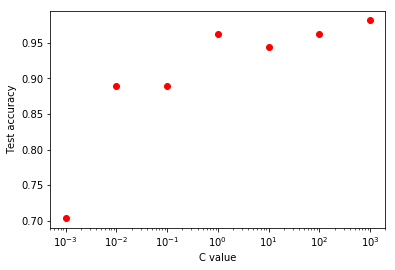

In [15]:
plt.semilogx(j, k, 'ro')
plt.ylabel("Test accuracy")
plt.xlabel("C value")
plt.show

## Support Vector Machine
The next 3 cells train a support vector machine on the dataset

In [16]:
from sklearn.svm import SVC

In [17]:
model = SVC(kernel='linear', C=1.0, random_state=1)

In [18]:
model.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

Then we use this model to make a prediction based on the test set which turns out to be 100 percent accurate

In [19]:
SVMpred = model.predict(X_test_std)

In [20]:
print(classification_report(y_test, SVMpred))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00        23
          2       1.00      1.00      1.00        19
          3       1.00      1.00      1.00        12

avg / total       1.00      1.00      1.00        54



In [21]:
print('Accuracy: %.2f' % accuracy_score(y_test, SVMpred))

Accuracy: 1.00


In [22]:
#pre allocating the correct amount of space for my variables
j = np.zeros((1,7))
k = np.zeros((1,7))

The next cell trains 7 different iterations of a support vector machine, with c values from 0.001 to 1000 and put the c value and test error into two different vectors

In [23]:
i = 0.001
g = 0
while i <= 1000:
    model = SVC(kernel='linear', C=i, random_state=1)
    model.fit(X_train_std, y_train)
    SVMpred = model.predict(X_test_std)
    a = accuracy_score(y_test, SVMpred)
    j[0,g] = i 
    k[0,g] = a
    g += 1
    i *= 10

Then I plotted the Test accuracy vs the C value on a logarithmic scale because the C values get multiplied by 10 each time. Generally, the test error goes down as the C value gets larger But there are fluctuations as the error increases after one and does not get back to 100% accuracy.

<function matplotlib.pyplot.show>

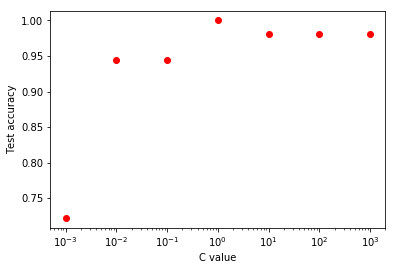

In [24]:
plt.semilogx(j, k, 'ro')
plt.ylabel("Test accuracy")
plt.xlabel("C value")
plt.show